In [116]:
import pandas as pd, matplotlib.pyplot as plt
from prophet import Prophet

In [117]:
df = pd.read_csv('../data/소비자물가지수_11131103.csv')
df

,계정항목,총지수,식료품 및 비주류음료,식료품,빵 및 곡물,쌀,현미,찹쌀,보리쌀,콩,...,보육시설이용료,요양시설이용료,보험서비스료,자동차보험료,금융수수료,부동산중개수수료,행정수수료,대입전형료,시험응시료,장례비
0,2014/01,93.730,85.705,85.143,87.809,87.742,NaN,86.922,107.760,83.926,...,91.716,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.836
1,2014/02,93.980,86.581,86.074,88.665,87.728,NaN,86.846,108.985,83.679,...,91.716,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.896
2,2014/03,94.153,86.810,86.256,88.473,87.212,NaN,86.959,110.481,82.455,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.999
3,2014/04,94.214,86.733,86.203,88.547,87.205,NaN,86.751,111.633,81.994,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,89.419,92.112
4,2014/05,94.369,86.741,86.165,88.480,86.641,NaN,86.286,112.417,80.851,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,89.419,91.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df['계정항목'] = df['계정항목'].str.replace('/', '-')

In [119]:
df

,계정항목,총지수,식료품 및 비주류음료,식료품,빵 및 곡물,쌀,현미,찹쌀,보리쌀,콩,...,보육시설이용료,요양시설이용료,보험서비스료,자동차보험료,금융수수료,부동산중개수수료,행정수수료,대입전형료,시험응시료,장례비
0,2014-01,93.730,85.705,85.143,87.809,87.742,NaN,86.922,107.760,83.926,...,91.716,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.836
1,2014-02,93.980,86.581,86.074,88.665,87.728,NaN,86.846,108.985,83.679,...,91.716,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.896
2,2014-03,94.153,86.810,86.256,88.473,87.212,NaN,86.959,110.481,82.455,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.999
3,2014-04,94.214,86.733,86.203,88.547,87.205,NaN,86.751,111.633,81.994,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,89.419,92.112
4,2014-05,94.369,86.741,86.165,88.480,86.641,NaN,86.286,112.417,80.851,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,89.419,91.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df['계정항목'] = pd.to_datetime(df['계정항목'])

In [121]:
df = df.iloc[:133, :]

In [122]:
df.iloc[0, :]

계정항목                2014-01-01 00:00:00
총지수                               93.73
  식료품 및 비주류음료                    85.705
    식료품                          85.143
      빵 및 곡물                     87.809
                           ...         
        부동산중개수수료                103.305
        행정수수료                     100.0
        대입전형료                   116.808
        시험응시료                    84.324
        장례비                      91.836
Name: 0, Length: 582, dtype: object

In [123]:
df

,계정항목,총지수,식료품 및 비주류음료,식료품,빵 및 곡물,쌀,현미,찹쌀,보리쌀,콩,...,보육시설이용료,요양시설이용료,보험서비스료,자동차보험료,금융수수료,부동산중개수수료,행정수수료,대입전형료,시험응시료,장례비
0,2014-01-01,93.730,85.705,85.143,87.809,87.742,NaN,86.922,107.760,83.926,...,91.716,74.892,NaN,90.137,100.09,103.305,100.00,116.808,84.324,91.836
1,2014-02-01,93.980,86.581,86.074,88.665,87.728,NaN,86.846,108.985,83.679,...,91.716,74.892,NaN,90.137,100.09,103.305,100.00,116.808,84.324,91.896
2,2014-03-01,94.153,86.810,86.256,88.473,87.212,NaN,86.959,110.481,82.455,...,99.141,74.892,NaN,90.137,100.09,103.305,100.00,116.808,84.324,91.999
3,2014-04-01,94.214,86.733,86.203,88.547,87.205,NaN,86.751,111.633,81.994,...,99.141,74.892,NaN,90.137,100.09,103.305,100.00,116.808,89.419,92.112
4,2014-05-01,94.369,86.741,86.165,88.480,86.641,NaN,86.286,112.417,80.851,...,99.141,74.892,NaN,90.137,100.09,103.305,100.00,116.808,89.419,91.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2024-09-01,114.650,124.720,125.050,117.880,98.350,104.13,101.390,142.690,105.670,...,88.860,112.870,163.55,94.450,100.00,92.280,98.67,94.030,116.100,108.440
129,2024-10-01,114.690,124.530,124.740,119.010,99.180,104.00,101.340,143.840,105.710,...,88.860,112.870,163.55,94.450,100.00,92.280,98.67,94.030,116.100,108.510
130,2024-11-01,114.400,121.320,121.240,119.440,99.880,105.28,104.690,149.160,105.820,...,88.860,112.870,163.55,94.450,100.00,92.280,98.67,94.030,116.100,108.510
131,2024-12-01,114.910,123.610,123.520,121.150,99.380,108.51,111.300,158.420,106.630,...,88.860,112.870,163.55,94.450,100.00,92.280,98.67,94.030,116.100,108.580


In [124]:
df.columns = df.columns.str.strip()

In [125]:
df.to_csv('../data/price_level_index.csv', index=False)

In [126]:
df_1 = df[['계정항목', '총지수']] # 총지수 자리는 입력 받기

In [127]:
df_1

,계정항목,총지수
0,2014-01-01,93.730
1,2014-02-01,93.980
2,2014-03-01,94.153
3,2014-04-01,94.214
4,2014-05-01,94.369
...,...,...
128,2024-09-01,114.650
129,2024-10-01,114.690
130,2024-11-01,114.400
131,2024-12-01,114.910


In [128]:
df_1.columns = ['ds', 'y']

In [129]:
model = Prophet() # 매번 새로운 모델. -> py 파일에서 선언해줄 것

In [130]:
model.fit(df_1)

18:14:49 - cmdstanpy - INFO - Chain [1] start processing


18:14:49 - cmdstanpy - INFO - Chain [1] done processing


In [131]:
future = model.make_future_dataframe(periods=36, freq='M')

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [132]:
future

,ds
0,2014-01-01
1,2014-02-01
2,2014-03-01
3,2014-04-01
4,2014-05-01
...,...
164,2027-08-31
165,2027-09-30
166,2027-10-31
167,2027-11-30


In [133]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,93.896119,93.510683,94.254620,93.896119,93.896119,-0.011497,-0.011497,-0.011497,-0.011497,-0.011497,-0.011497,0.0,0.0,0.0,93.884623
1,2014-02-01,93.951844,93.774181,94.475785,93.951844,93.951844,0.177706,0.177706,0.177706,0.177706,0.177706,0.177706,0.0,0.0,0.0,94.129549
2,2014-03-01,94.002175,93.692670,94.410537,94.002175,94.002175,0.059570,0.059570,0.059570,0.059570,0.059570,0.059570,0.0,0.0,0.0,94.061746
3,2014-04-01,94.057899,93.789834,94.469439,94.057899,94.057899,0.078566,0.078566,0.078566,0.078566,0.078566,0.078566,0.0,0.0,0.0,94.136466
4,2014-05-01,94.111826,93.895090,94.599315,94.111826,94.111826,0.129252,0.129252,0.129252,0.129252,0.129252,0.129252,0.0,0.0,0.0,94.241078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2027-08-31,123.235360,119.935043,126.654176,120.290507,126.808747,-0.233216,-0.233216,-0.233216,-0.233216,-0.233216,-0.233216,0.0,0.0,0.0,123.002144
165,2027-09-30,123.465473,120.611619,127.713104,120.340100,127.247577,0.342800,0.342800,0.342800,0.342800,0.342800,0.342800,0.0,0.0,0.0,123.808273
166,2027-10-31,123.703256,120.020775,127.416062,120.359415,127.722371,-0.291472,-0.291472,-0.291472,-0.291472,-0.291472,-0.291472,0.0,0.0,0.0,123.411784
167,2027-11-30,123.933368,120.177331,128.085205,120.442496,128.159066,-0.148095,-0.148095,-0.148095,-0.148095,-0.148095,-0.148095,0.0,0.0,0.0,123.785273


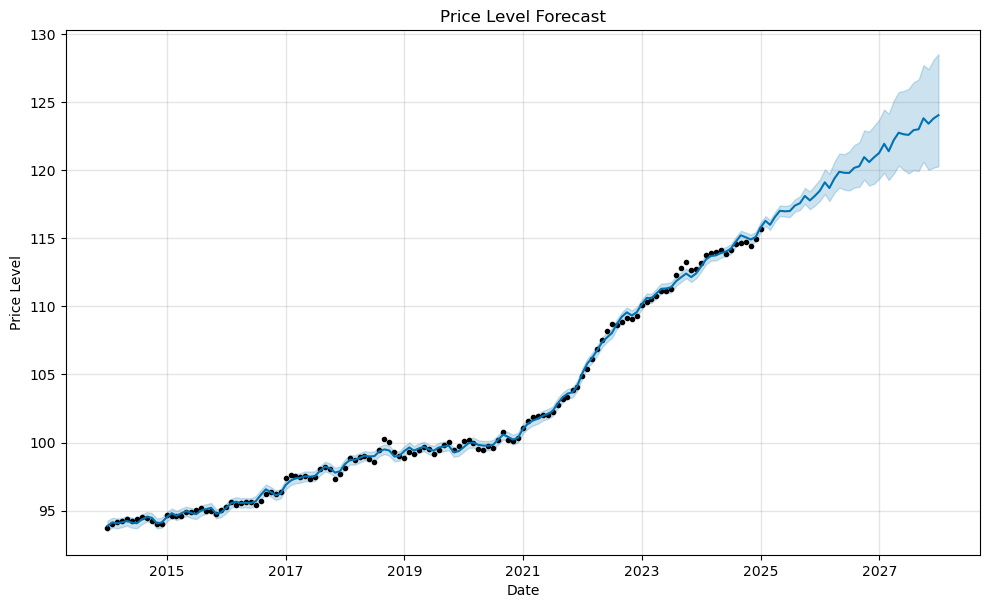

In [134]:
model.plot(forecast)
plt.title('Price Level Forecast')
plt.xlabel('Date')
plt.ylabel('Price Level')
plt.show()

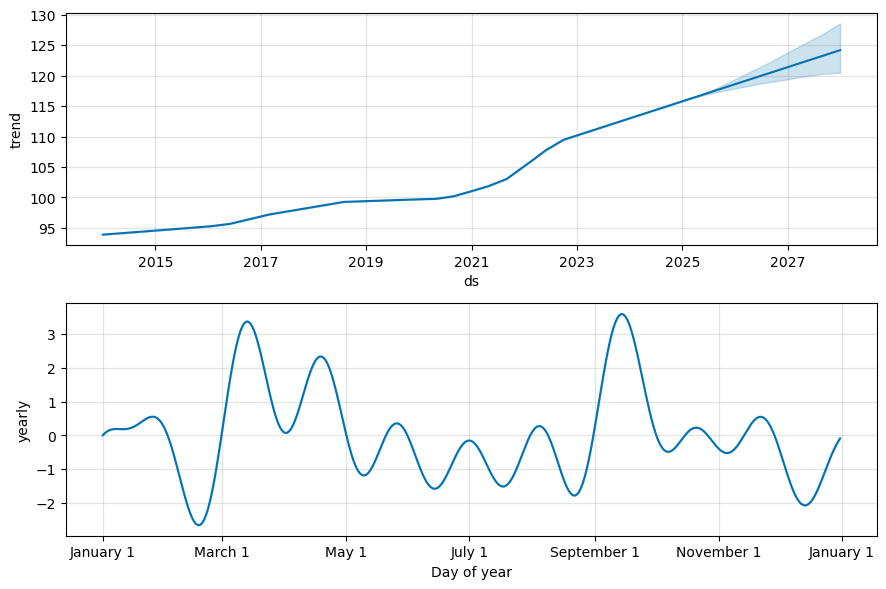

In [135]:
model.plot_components(forecast)
plt.show() # 아마 추석 연휴라 9~10월 전후해 물가 상승이 커지는 듯

In [136]:
forecast.loc[forecast['ds'] == '2025-01-31', 'trend'].values[0]

116.00982584941848

In [137]:
# 현재 대비 특정 시점의 물가 상승률 (%)
(forecast.loc[forecast['ds'] == '2025-12-31', 'trend'].values[0] / df_1.iloc[df_1.index.max(), 1]) * 100

102.47320518600857

In [138]:
forecast.loc[forecast['ds'] == '2025-12-31', 'trend'].values[0]  / df_1.iloc[df_1.index.max(), 1]

1.0247320518600858